# DATA INSPECTION

Once all periodograms have been calculated for both RV time series and TESS light curves, we make a quick inspection of the resulting input data and results.

## Modules and configuration

### Modules

In [1]:
import numpy as np
import pandas as pd

from scipy.stats import mode, normaltest, ttest_ind

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import seaborn as sns
sns.set_style("white", {'figure.figsize':(15,10)})

### Configuration

In [2]:
INPUT_FILE = "../data/CARM_VIS_objects_with_PG.csv"
SYNTH_POP_FILE = "../data/Auxiliary_data/ETLed__NoLimit_TFM_02_MW_2022-01-13-19-18-22_hdr.csv"

IMAGE_FOLDER = "./img/"

IMAGE_RANGED_OUT_FULL_HR = "./img/ETL_46_03_ML_subsample_Instability_bands_Ranged_Full_HR.png"
IMAGE_RANGED_OUT_ZOOM_HR = "./img/ETL_46_03B_ML_subsample_Instability_bands_Ranged_Zoom_HR.png"

ALPHA = 1e-3 # Significance threshold for statistical tests

### Functions

In [3]:
def draw_hist(d1, d1_label, fig_filename=None):
    '''Draws an histogram of the values passed. It also calulates the statistics
    and tests the goodness of fit by a Gaussian distribution'''
    # Plots and saves the figure
    kwargs = dict(hist_kws={'alpha':.4}, kde_kws={'linewidth':2})
    plt.figure(figsize=(10,7))
    plt.title(d1_label + " values distribution", fontsize=16)
    plt.grid(axis='x', alpha=0.75)
    plt.xlabel(d1_label, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    sns.distplot(d1, label=d1_label, **kwargs)
    #sns.histplot(d1, label=d1_label)
    #plt.xlim(0,100)
    #plt.legend(loc='upper right');
    # Save the image:
    if fig_filename is None:
        pass
    else:
        plt.savefig(fig_filename, format='png')
    # Display basic statistics:
    print(pd.Series(d1).describe())
    # Perform the normaltest (D'Agostino and Pearson) for Gaussian distribution fit:
    k2, p = normaltest(d1)
    alpha = ALPHA
    print("p = {:g}".format(p))
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print("***This distribution does NOT come from a Gaussian distribution" \
              "(with significance level = %.6f)" %(1.0 - alpha))
    else:
        print("This distribution MIGHT COME come from Gaussian distribution" \
              "(with significance level = %.6f)" %(1.0 - alpha))

In [4]:
def compare_dist(d1, d2, d1_label, d2_label, varname=None, fig_title=None, fig_filename=None):
    '''Plots and saves overlapped histograms.
    It also shows the result of a t-Student test.'''
    # Plots and saves the figure
    kwargs = dict(hist_kws={'alpha':.4}, kde_kws={'linewidth':2})
    plt.figure(figsize=(10,7))
    if fig_title is None:
        plt.title("Comparison of distributions", fontsize=16)
    else:
        plt.title(fig_title, fontsize=16)
    plt.grid(axis='x', alpha=0.75)
    if varname is None:
        plt.xlabel("%s / %s" %(d1_label, d2_label), fontsize=12)
    else:
        plt.xlabel(varname, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    sns.distplot(d1, label=d1_label, **kwargs)
    sns.distplot(d2, label=d2_label, **kwargs)
    #plt.xlim(0,100)
    plt.legend(loc='upper right');
    # Save the image:
    if fig_filename is None:
        pass
    else:
        plt.savefig(fig_filename, format='png')
    # Perform the t-Student test (as independent samples):
    stat, p = ttest_ind(d1, d2)
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Probably the same distribution')
    else:
        print('***Probably different distributions')

##  Load the CARM_VIS objects

In [5]:
df = pd.read_csv(INPUT_FILE, sep=',', decimal='.')
df.head()

,Karmn,Name,Comp,GJ,RA_J2016_deg,DE_J2016_deg,RA_J2000,DE_J2000,l_J2016_deg,b_J2016_deg,...,WF_offset_PG_TESS,WF_e_offset_PG_TESS,WF_FAP_PG_TESS,WF_valid_PG_TESS,WF_error_PG_TESS,WF_elapsed_time_PG_TESS,WF_plain_file_TESS,WF_fig_file_TESS,PG_file_RV,PG_file_TESS
0,J23585+076,Wolf 1051,AB,4383,359.636420,7.656947,23:58:32.65,+07:39:30.1,100.839686,-52.931049,...,NaN,NaN,NaN,0.0,Not recognized as a supported data product:\nn...,0.000997,NaN,NaN,../data/CARM_VIS_RVs_PGs/J23585+076_RV_PG.dat,NaN
1,J23556-061,GJ 912,AB,912,358.913617,-6.144283,23:55:39.78,-06:08:33.4,88.129933,-65.175491,...,NaN,NaN,NaN,0.0,Not recognized as a supported data product:\nn...,0.000998,NaN,NaN,../data/CARM_VIS_RVs_PGs/J23556-061_RV_PG.dat,NaN
2,J23548+385,RX J2354.8+3831,-,NaN,358.713658,38.526340,23:54:51.46,+38:31:36.2,110.941908,-23.024449,...,999.999756,2.151008e-06,1.0,1.0,NaN,94.758838,../data/CARM_VIS_TESS_WinFunc_PGs/WF_J23548+38...,../data/CARM_VIS_TESS_WinFunc_PGs/figures/WF_J...,../data/CARM_VIS_RVs_PGs/J23548+385_RV_PG.dat,../data/CARM_VIS_TESS_PGs/J23548+385_RV_PG.dat
3,J23505-095,LP 763-012,-,4367,357.634705,-9.560964,23:50:31.64,-09:33:32.7,80.777067,-67.303426,...,1000.000122,9.022946e-07,1.0,1.0,NaN,132.607176,../data/CARM_VIS_TESS_WinFunc_PGs/WF_J23505-09...,../data/CARM_VIS_TESS_WinFunc_PGs/figures/WF_J...,../data/CARM_VIS_RVs_PGs/J23505-095_RV_PG.dat,../data/CARM_VIS_TESS_PGs/J23505-095_RV_PG.dat
4,J23492+024,BR Psc,-,908,357.306604,2.396918,23:49:12.53,+02:24:04.4,93.567467,-56.885396,...,NaN,NaN,NaN,0.0,Not recognized as a supported data product:\nn...,0.001995,NaN,NaN,../data/CARM_VIS_RVs_PGs/J23492+024_RV_PG.dat,NaN


In [6]:
print(list(df.columns))

['Karmn', 'Name', 'Comp', 'GJ', 'RA_J2016_deg', 'DE_J2016_deg', 'RA_J2000', 'DE_J2000', 'l_J2016_deg', 'b_J2016_deg', 'Ref01', 'SpT', 'SpTnum', 'Ref02', 'Teff_K', 'eTeff_K', 'logg', 'elogg', '[Fe/H]', 'e[Fe/H]', 'Ref03', 'L_Lsol', 'eL_Lsol', 'Ref04', 'R_Rsol', 'eR_Rsol', 'Ref05', 'M_Msol', 'eM_Msol', 'Ref06', 'muRA_masa-1', 'emuRA_masa-1', 'muDE_masa-1', 'emuDE_masa-1', 'Ref07', 'pi_mas', 'epi_mas', 'Ref08', 'd_pc', 'ed_pc', 'Ref09', 'Vr_kms-1', 'eVr_kms-1', 'Ref10', 'ruwe', 'Ref11', 'U_kms-1', 'eU_kms-1', 'V_kms-1', 'eV_kms-1', 'W_kms-1', 'eW_kms-1', 'Ref12', 'sa_m/s/a', 'esa_m/s/a', 'Ref13', 'SKG', 'Ref14', 'SKG_lit', 'Ref14_lit', 'Pop', 'Ref15', 'vsini_flag', 'vsini_kms-1', 'evsini_kms-1', 'Ref16', 'P_d', 'eP_d', 'Ref17', 'pEWHalpha_A', 'epEWHalpha_A', 'Ref18', 'log(LHalpha/Lbol)', 'elog(LHalpha/Lbol)', 'Ref19', '1RXS', 'CRT_s-1', 'eCRT_s-1', 'HR1', 'eHR1', 'HR2', 'eHR2', 'Flux_X_E-13_ergcm-2s-1', 'eFlux_X_E-13_ergcm-2s-1', 'LX/LJ', 'eLX/LJ', 'Ref20', 'Activity', 'Ref21', 'FUV_mag',

## Data statistics

### Overall data statistics

#### Instability band analysis (Overall) 

In [7]:
df[['InstBand_nominal', 'InstBand_ranged']].describe()

,InstBand_nominal,InstBand_ranged
count,390,390
unique,2,2
top,He3-burning,He3-burning
freq,243,279


**OBSERVATION:** we have 243 stars inside the instability band ($\approx62\%$). If we consider the value ranges given by the errors in the variables, the number rises to 279 stars ($\approx72\%$).

#### RV curves characteristics (Overall)

In [8]:
rv_main_vars = df[['Karmn', 'n_RV', 'Ps_RV', 'fs_RV', 'wmean_RV', 'wrms_RV',
                   'rms_PG_RV', 'f_PG_RV', 'Pd_PG_RV', 'FAP_PG_RV']] \
    .copy()

In [9]:
rv_main_vars.describe()

,n_RV,Ps_RV,fs_RV,wmean_RV,wrms_RV,rms_PG_RV,f_PG_RV,Pd_PG_RV,FAP_PG_RV
count,387.000000,387.000000,387.000000,3.870000e+02,387.000000,3.870000e+02,387.000000,387.000000,3.870000e+02
mean,51.979328,15.805441,1.431340,-1.651589e+00,361.871528,7.720542e+01,129.676001,0.055950,1.891508e-01
std,76.124792,28.078791,17.256361,4.359460e+01,2564.902866,4.348958e+02,90.337377,0.109089,2.670231e-01
min,4.000000,0.003176,0.003251,-4.853787e+02,0.666710,1.075686e-07,2.523040,0.003474,7.762397e-23
25%,14.000000,3.294005,0.054617,-1.322098e-01,2.684700,1.213657e+00,44.390640,0.004842,9.308827e-03
50%,30.000000,8.830573,0.113243,-1.110223e-16,4.015005,2.450123e+00,136.619040,0.007320,6.484606e-02
75%,60.000000,18.311180,0.304807,2.498002e-16,11.644566,5.280105e+00,206.529200,0.022528,2.476015e-01
max,768.000000,307.604864,314.907497,5.132076e+02,31233.301918,5.173615e+03,287.816080,0.396347,1.000000e+00


**OBSERVATION:** RV times series values (Minimum - Median - Maximum) for the whole sample:
- `n_RV`, number of RV points: (4 - 30 - 768)
- `Ps_RV`, sampling period: (0.0032 - 8.83 - 308) days
- `wrms_RV`, RMS value of the RV time series: (0.67 / 4.02 / 31233) m/s
- `Pd_PG_RV`, detected periodogram periods: (0.0035 - 0.0073 - 0.3964) d = (5 min - 11 min - 9.5 h)
- `FAP_PG_RV`, False Alarm Probability for calculated peak: (7.76e-23 - 0.065 - 1.00)

##### Number of points analysis (RV curves - Overall)

C:\Users\ciroe\AppData\Local\Temp\ipykernel_24216\2009648228.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d1, label=d1_label, **kwargs)


count    387.000000
mean      51.979328
std       76.124792
min        4.000000
25%       14.000000
50%       30.000000
75%       60.000000
max      768.000000
Name: n_RV, dtype: float64
p = nan
This distribution MIGHT COME come from Gaussian distribution(with significance level = 0.999000)


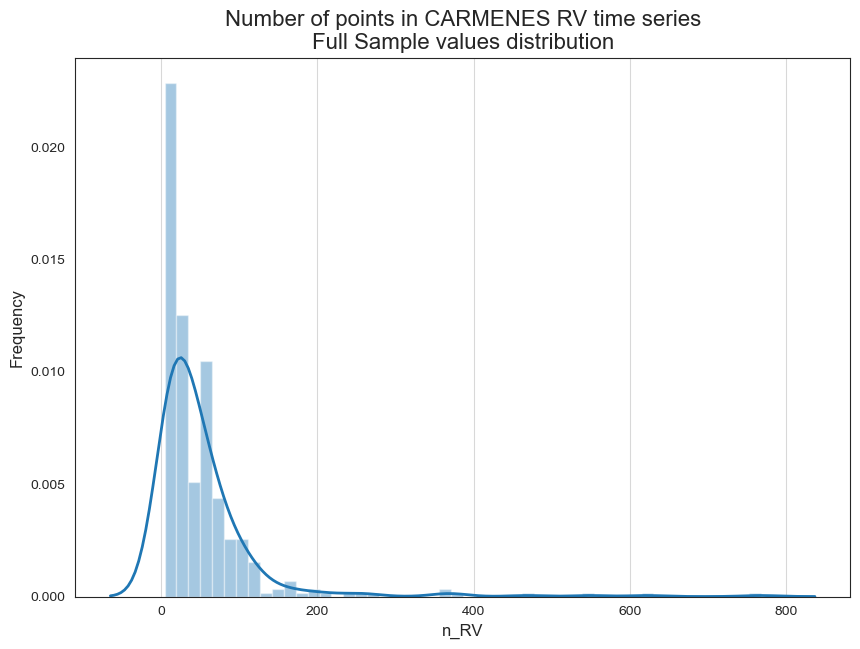

In [10]:
draw_hist(rv_main_vars['n_RV'], "Number of points in CARMENES RV time series\nFull Sample",
          fig_filename=IMAGE_FOLDER + "ETL_46_01_RV_Number_of_points_distribution.png")

In [11]:
np.nanquantile(rv_main_vars['n_RV'], q=0.94)

122.83999999999997

In [12]:
np.nanquantile(rv_main_vars['n_RV'], q=0.95)

139.19999999999982

In [13]:
np.nanquantile(rv_main_vars['n_RV'], q=0.96)

159.0

**OBSERVATION:**
- Most of the RV time series ($95\%$) have less than $\approx140$ points.

##### Sampling period analysis (RV curves - Overall)

C:\Users\ciroe\AppData\Local\Temp\ipykernel_24216\2009648228.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d1, label=d1_label, **kwargs)


count    387.000000
mean      15.805441
std       28.078791
min        0.003176
25%        3.294005
50%        8.830573
75%       18.311180
max      307.604864
Name: Ps_RV, dtype: float64
p = nan
This distribution MIGHT COME come from Gaussian distribution(with significance level = 0.999000)


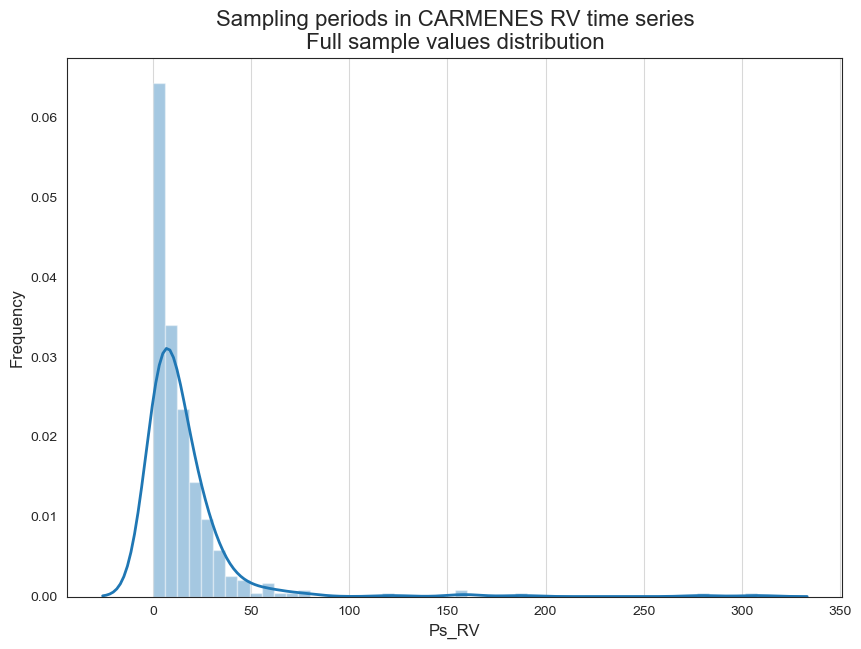

In [14]:
draw_hist(rv_main_vars['Ps_RV'], "Sampling periods in CARMENES RV time series\nFull sample",
          fig_filename=IMAGE_FOLDER + "ETL_46_02_RV_Sampling_period_distribution.png")

In [15]:
np.nanquantile(rv_main_vars['Ps_RV'], q=0.03)

0.9830872804718092

In [16]:
np.nanquantile(rv_main_vars['Ps_RV'], q=0.04)

1.0073478420823812

**OBSERVATION:**
- Most of the RV time series ($96\%$) have sampling periods greater than $\approx1$ day.

##### RMS analysis (RV curves - Overall)

C:\Users\ciroe\AppData\Local\Temp\ipykernel_24216\2009648228.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d1, label=d1_label, **kwargs)


count      387.000000
mean       361.871528
std       2564.902866
min          0.666710
25%          2.684700
50%          4.015005
75%         11.644566
max      31233.301918
Name: wrms_RV, dtype: float64
p = nan
This distribution MIGHT COME come from Gaussian distribution(with significance level = 0.999000)


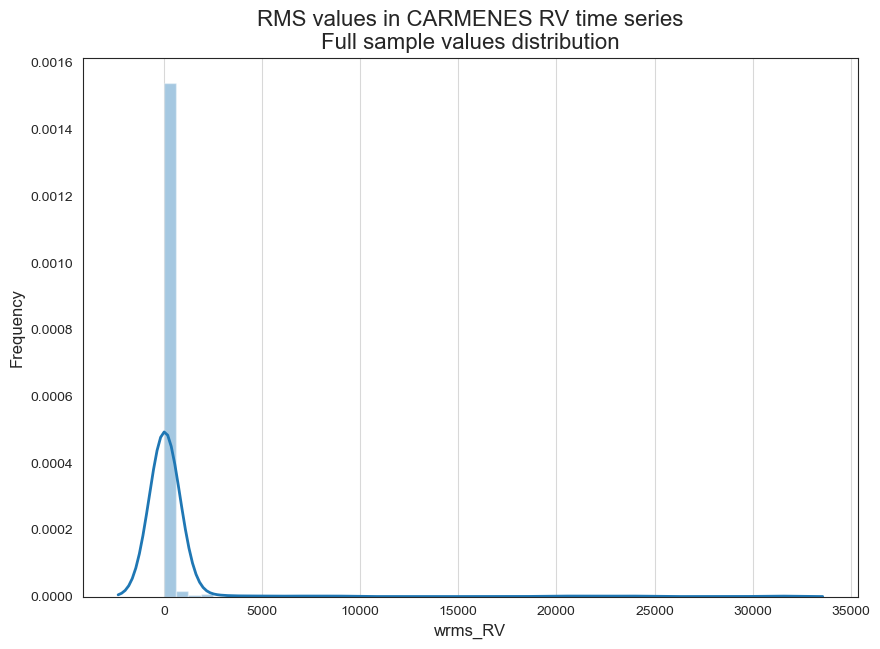

In [17]:
draw_hist(rv_main_vars['wrms_RV'], "RMS values in CARMENES RV time series\nFull sample",
          fig_filename=IMAGE_FOLDER + "ETL_46_03_RV_RMS_values_distribution.png")

In [18]:
np.nanquantile(rv_main_vars['wrms_RV'], q=0.60)

4.9766402479075476

In [19]:
np.nanquantile(rv_main_vars['wrms_RV'], q=0.61)

5.178084680528026

**OBSERVATION:**
- $60\%$ of the time series show RMS values (outliers removed) lower than $5\;m\;s^{-1}$.

In [20]:
np.nanquantile(rv_main_vars['wrms_RV'], q=0.74)

10.916976682359135

In [21]:
np.nanquantile(rv_main_vars['wrms_RV'], q=0.75)

11.644566417612893

In [22]:
np.nanquantile(rv_main_vars['wrms_RV'], q=0.76)

12.41713513867993

**OBSERVATION:**
- $75\%$ of the time series show RMS values (outliers removed) lower than $12\;m\;s^{-1}$.

### Select objects for periodogram analysis

In [23]:
pg_df = df[(df['valid_PG_TESS'] == 1.0) & (df['valid_PG_RV'] == 1.0)].copy()
len(pg_df)

269

### PG subsample statistics

#### Instability band analysis (PG subsample) 

In [24]:
pg_df[['InstBand_nominal', 'InstBand_ranged']].describe()

,InstBand_nominal,InstBand_ranged
count,269,269
unique,2,2
top,He3-burning,He3-burning
freq,173,199


**OBSERVATION:** we have 173 stars inside the instability band ($\approx64\%$). If we consider the value ranges given by the errors in the variables, the number rises to 199 stars ($\approx74\%$). This values are similar to the ones calculated for the overall sample ($\approx62\%$ and $\approx72\%$, respectively).

#### RV curves characteristics (PG subsample)

In [25]:
pg_rv_main_vars = pg_df[['Karmn', 'n_RV', 'Ps_RV', 'fs_RV', 'wmean_RV', 'wrms_RV',
                         'rms_PG_RV', 'f_PG_RV', 'Pd_PG_RV', 'FAP_PG_RV']] \
    .copy()

In [26]:
pg_rv_main_vars.describe()

,n_RV,Ps_RV,fs_RV,wmean_RV,wrms_RV,rms_PG_RV,f_PG_RV,Pd_PG_RV,FAP_PG_RV
count,269.000000,269.000000,269.000000,2.690000e+02,269.000000,2.690000e+02,269.000000,269.000000,2.690000e+02
mean,50.048327,16.728466,1.444508,-1.786416e-01,358.983143,7.722953e+01,131.958813,0.056387,1.902993e-01
std,71.123667,32.342565,19.199433,4.331982e+01,2761.133869,4.784281e+02,91.563990,0.110383,2.639847e-01
min,4.000000,0.003176,0.003251,-4.853787e+02,0.666710,2.028377e-07,2.523040,0.003474,7.762397e-23
25%,14.000000,3.045991,0.055488,-9.268733e-02,2.629892,1.098082e+00,46.136480,0.004718,9.142226e-03
50%,30.000000,8.935142,0.111918,-5.551115e-17,4.042970,2.562199e+00,138.875520,0.007201,6.533983e-02
75%,58.000000,18.022019,0.328300,2.220446e-16,10.918993,5.200497e+00,211.958400,0.021675,2.488470e-01
max,768.000000,307.604864,314.907497,5.132076e+02,31233.301918,5.173615e+03,287.816080,0.396347,1.000000e+00


**OBSERVATION:** RV time series values (Minimum - Median - Maximum) for periodogram analysis subsample (in **bold**, the changes relative to the stats of the overall sample):
- `n_RV`, number of RV points: (4 - 30 - 768)
- `Ps_RV`, sampling period: (0.0032 - **8.93** - 308) days
- `wrms_RV`, RMS value of the RV time series: (0.67 / **4.04** / **5174**) m/s
- `Pd_PG_RV`, detected periodogram periods: (0.0035 - **0.0072** - 0.3964) d = (5 min - 10 min - 9.5 h)
- `FAP_PG_RV`, False Alarm Probability for calculated peak: (7.76e-23 - **0.065** - 1.00)

##### Number of points analysis (RV curves - PG subsample)

C:\Users\ciroe\AppData\Local\Temp\ipykernel_24216\2009648228.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d1, label=d1_label, **kwargs)


count    269.000000
mean      50.048327
std       71.123667
min        4.000000
25%       14.000000
50%       30.000000
75%       58.000000
max      768.000000
Name: n_RV, dtype: float64
p = 3.77515e-74
***This distribution does NOT come from a Gaussian distribution(with significance level = 0.999000)


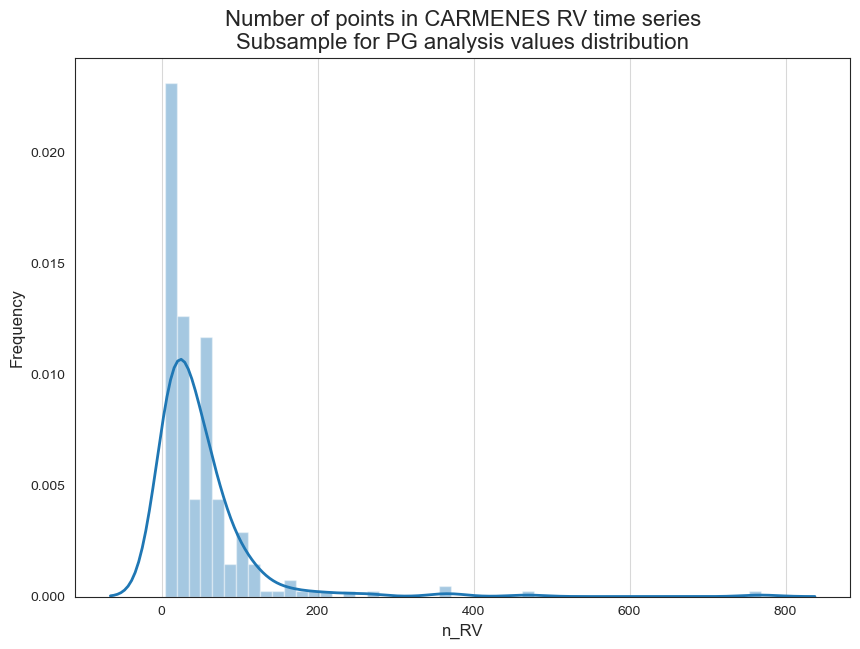

In [27]:
draw_hist(pg_rv_main_vars['n_RV'],
          "Number of points in CARMENES RV time series\nSubsample for PG analysis",
          fig_filename=IMAGE_FOLDER + "ETL_46_04_PG_SUBSAMPLE_RV_Number_of_points_distribution.png")

In [28]:
np.nanquantile(pg_rv_main_vars['n_RV'], q=0.94)

116.83999999999997

In [29]:
np.nanquantile(pg_rv_main_vars['n_RV'], q=0.95)

127.19999999999999

In [30]:
np.nanquantile(pg_rv_main_vars['n_RV'], q=0.96)

157.55999999999995

**OBSERVATION:**
- Most of the RV time series ($95\%$) have less than $\approx127$ points.

##### Sampling period analysis (RV curves - PG subsample)

C:\Users\ciroe\AppData\Local\Temp\ipykernel_24216\2009648228.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d1, label=d1_label, **kwargs)


count    269.000000
mean      16.728466
std       32.342565
min        0.003176
25%        3.045991
50%        8.935142
75%       18.022019
max      307.604864
Name: Ps_RV, dtype: float64
p = 2.39851e-77
***This distribution does NOT come from a Gaussian distribution(with significance level = 0.999000)


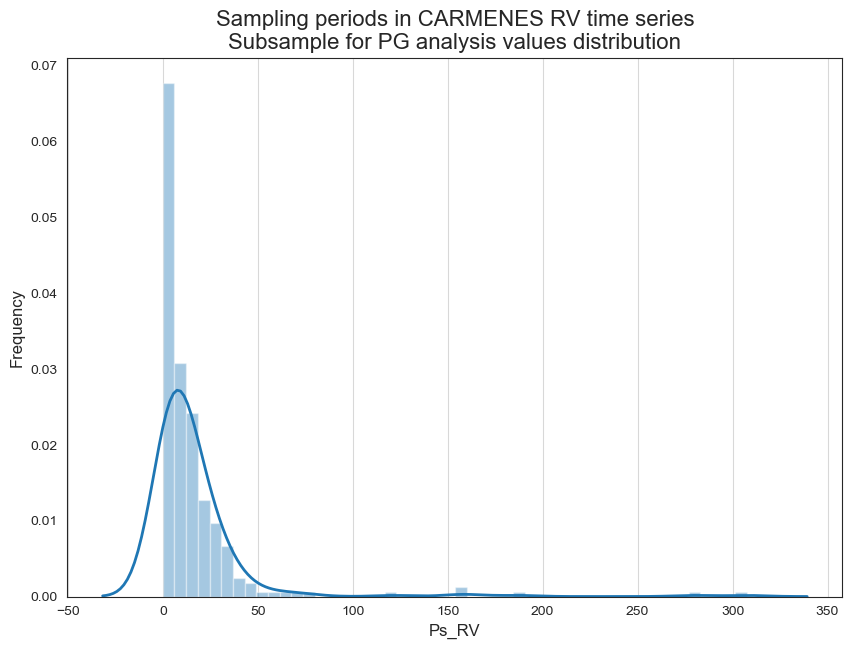

In [31]:
draw_hist(pg_rv_main_vars['Ps_RV'],
          "Sampling periods in CARMENES RV time series\nSubsample for PG analysis",
          fig_filename=IMAGE_FOLDER + "ETL_46_05_PG_SUBSAMPLE_RV_Sampling_period_distribution.png")

In [32]:
np.nanquantile(pg_rv_main_vars['Ps_RV'], q=0.03)

0.9800206009112299

In [33]:
np.nanquantile(pg_rv_main_vars['Ps_RV'], q=0.04)

1.005794213572517

**OBSERVATION:**
- Most of the RV time series ($96\%$) have sampling periods greater than $\approx1$ day.

##### RMS analysis (RV curves - PG subsample)

C:\Users\ciroe\AppData\Local\Temp\ipykernel_24216\2009648228.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d1, label=d1_label, **kwargs)


count      269.000000
mean       358.983143
std       2761.133869
min          0.666710
25%          2.629892
50%          4.042970
75%         10.918993
max      31233.301918
Name: wrms_RV, dtype: float64
p = 4.78514e-100
***This distribution does NOT come from a Gaussian distribution(with significance level = 0.999000)


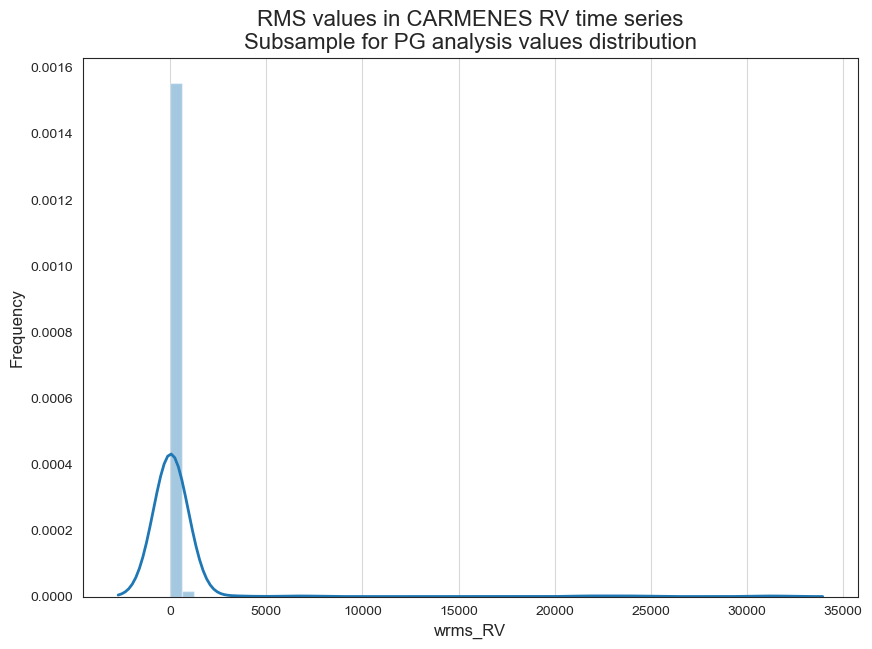

In [34]:
draw_hist(pg_rv_main_vars['wrms_RV'],
          "RMS values in CARMENES RV time series\nSubsample for PG analysis",
          fig_filename=IMAGE_FOLDER + "ETL_46_06_PG_SUBSAMPLE_RV_RMS_values_distribution.png")

In [35]:
np.nanquantile(pg_rv_main_vars['rms_PG_RV'], q=0.72)

4.853492673361452

In [36]:
np.nanquantile(pg_rv_main_vars['rms_PG_RV'], q=0.73)

5.042266327278396

**OBSERVATION:**
- $72\%$ of the time series show RMS values (outliers removed) lower than $5\;m\;s^{-1}$.

#### TESS curves characteristics

In [37]:
pg_tess_main_vars = pg_df[['Karmn', 'n_TESS', 'Ps_TESS', 'fs_TESS', 'wmean_TESS', 'wrms_TESS',
                           'rms_PG_TESS', 'f_PG_TESS', 'Pd_PG_TESS', 'FAP_PG_TESS']] \
    .copy()

In [38]:
pg_tess_main_vars.describe()

,n_TESS,Ps_TESS,fs_TESS,wmean_TESS,wrms_TESS,rms_PG_TESS,f_PG_TESS,Pd_PG_TESS,FAP_PG_TESS
count,269.000000,269.000000,269.000000,269.000000,269.000000,268.000000,269.000000,269.000000,2.680000e+02
mean,14215.910781,0.003134,653.977754,53439.481095,129.826990,127.764802,61.938491,0.182249,1.902460e-01
std,4644.388166,0.005464,198.323013,98811.975259,577.017548,576.523588,89.546294,0.153464,2.907751e-01
min,694.000000,0.001389,47.999082,-315455.875000,2.188334,2.057648,2.400000,0.003472,0.000000e+00
25%,13420.000000,0.001389,719.989932,8436.399414,16.514788,16.481823,3.057000,0.009471,2.982253e-09
50%,15602.000000,0.001389,719.997672,21288.244141,29.356222,28.499061,4.959000,0.201654,3.363451e-02
75%,16941.000000,0.001389,720.006838,57992.523438,68.504135,67.928839,105.588000,0.327118,2.580571e-01
max,18711.000000,0.020834,720.017204,661204.500000,8249.875000,8248.894960,288.000000,0.416667,1.000000e+00


**OBSERVATION:** TESS light curves values (Minimum - Median - Maximum) for periodogram analysis subsample:
- `n_TESS`, number of RV points: (694 - 15602 - 18711)
- `Ps_TESS`, sampling period: (0.0014 - 0.0014 - 0.0208) days
- `wrms_TESS`, RMS value of the TESS light curves: (2.18 / 29.4 / 8250) e/s
- `Pd_PG_TESS`, detected periodogram periods: (0.0035 - 0.2017 - 0.4167) d = (5 min - 4.8 h - 10 h)
- `FAP_PG_TESS`, False Alarm Probability for calculated peak: (0.000 - 0.034 - 1.00)

##### Number of points analysis (TESS curves - PG subsample)

C:\Users\ciroe\AppData\Local\Temp\ipykernel_24216\2009648228.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d1, label=d1_label, **kwargs)


count      269.000000
mean     14215.910781
std       4644.388166
min        694.000000
25%      13420.000000
50%      15602.000000
75%      16941.000000
max      18711.000000
Name: n_TESS, dtype: float64
p = 2.76257e-25
***This distribution does NOT come from a Gaussian distribution(with significance level = 0.999000)


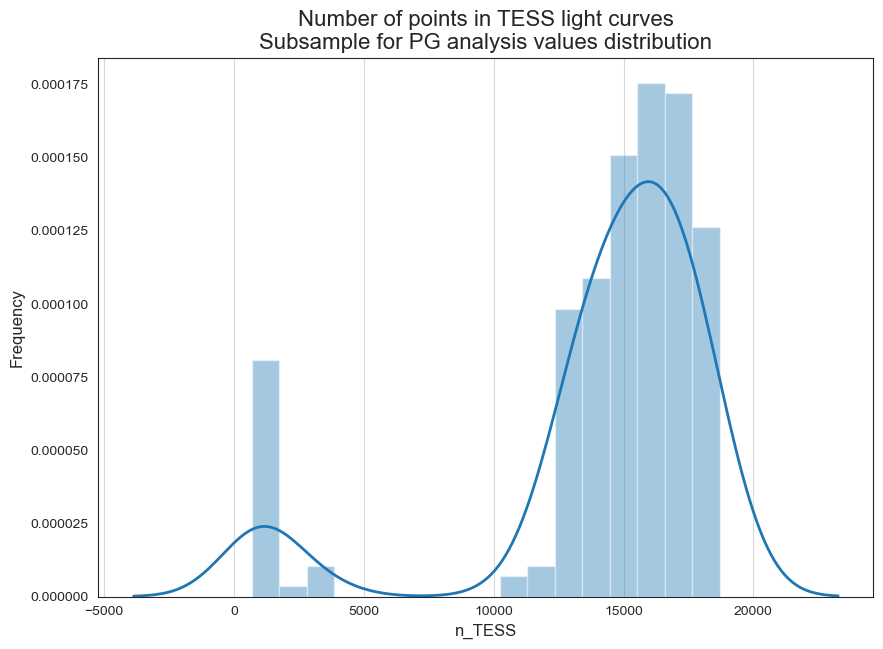

In [39]:
draw_hist(pg_tess_main_vars['n_TESS'],
          "Number of points in TESS light curves\nSubsample for PG analysis",
          fig_filename=IMAGE_FOLDER + "ETL_46_07_PG_SUBSAMPLE_TESS_Number_of_points_distribution.png")

In [40]:
np.nanquantile(pg_tess_main_vars['n_TESS'], q=0.95)

18424.0

**OBSERVATION:**
- Most of the TESS light curves ($95\%$) have at least $18424$ points.

##### Sampling period analysis (TESS curves - PG subsample)

C:\Users\ciroe\AppData\Local\Temp\ipykernel_24216\2009648228.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d1, label=d1_label, **kwargs)


count    269.000000
mean       0.003134
std        0.005464
min        0.001389
25%        0.001389
50%        0.001389
75%        0.001389
max        0.020834
Name: Ps_TESS, dtype: float64
p = 1.79621e-38
***This distribution does NOT come from a Gaussian distribution(with significance level = 0.999000)


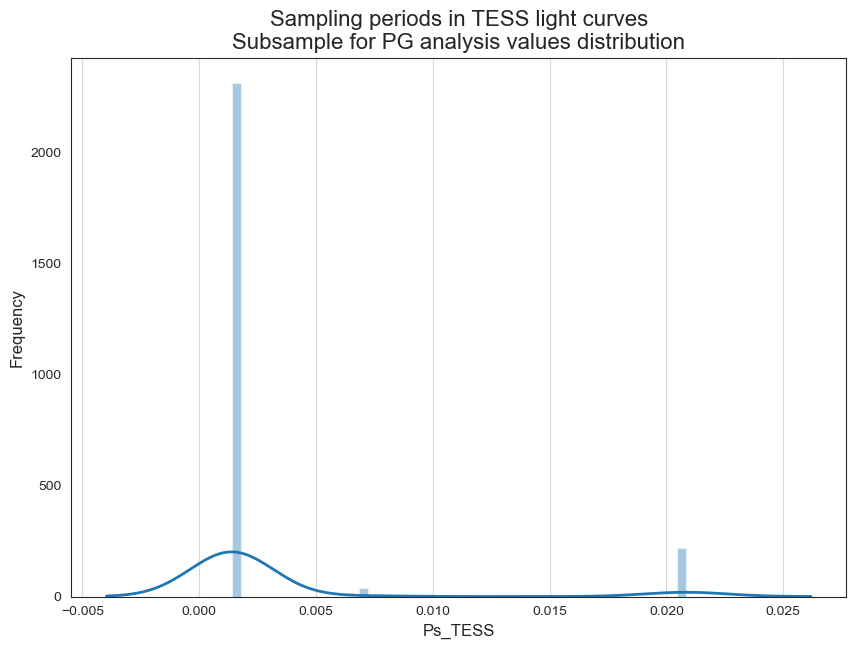

In [41]:
draw_hist(pg_tess_main_vars['Ps_TESS'],
          "Sampling periods in TESS light curves\nSubsample for PG analysis",
          fig_filename=IMAGE_FOLDER + "ETL_46_08_PG_SUBSAMPLE_TESS_Sampling_period_distribution.png")

In [42]:
np.nanquantile(pg_tess_main_vars['Ps_TESS'], q=0.91)

0.0069444321879927

In [43]:
np.nanquantile(pg_tess_main_vars['Ps_TESS'], q=0.92)

0.020832953005792625

In [44]:
len(pg_tess_main_vars[pg_tess_main_vars['Ps_TESS'] < 0.0014]) / len(pg_tess_main_vars)

0.8996282527881041

In [45]:
len(pg_tess_main_vars[pg_tess_main_vars['Ps_TESS'] >= 0.0014]) / len(pg_tess_main_vars)

0.10037174721189591

In [46]:
len(pg_tess_main_vars[pg_tess_main_vars['Ps_TESS'] < 0.0014]) / len(pg_tess_main_vars) + \
    len(pg_tess_main_vars[pg_tess_main_vars['Ps_TESS'] >= 0.0014]) / len(pg_tess_main_vars)

1.0

**OBSERVATION:**
- Most of the TESS time series ($90\%$) have sampling periods equal to $\approx0.001389\;day$ ($\approx2\;min$).

##### RMS analysis (TESS curves - PG subsample)

C:\Users\ciroe\AppData\Local\Temp\ipykernel_24216\2009648228.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d1, label=d1_label, **kwargs)


count     269.000000
mean      129.826990
std       577.017548
min         2.188334
25%        16.514788
50%        29.356222
75%        68.504135
max      8249.875000
Name: wrms_TESS, dtype: float64
p = 7.2337e-114
***This distribution does NOT come from a Gaussian distribution(with significance level = 0.999000)


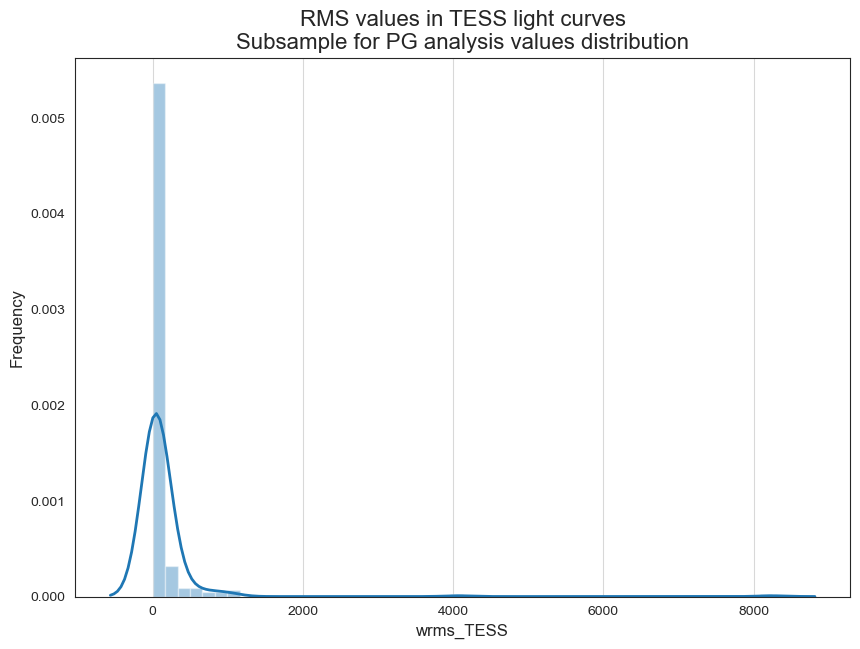

In [47]:
draw_hist(pg_tess_main_vars['wrms_TESS'],
          "RMS values in TESS light curves\nSubsample for PG analysis",
          fig_filename=IMAGE_FOLDER + "ETL_46_09_PG_SUBSAMPLE_TESS_RMS_values_distribution.png")

In [48]:
np.nanquantile(pg_tess_main_vars['rms_PG_TESS'], q=0.75)

67.92883930590446

In [49]:
np.nanquantile(pg_tess_main_vars['rms_PG_TESS'], q=0.76)

69.28166357206263

**OBSERVATION:**
- $75\%$ of the light curves show RMS values (outliers removed) lower than $68\;\rm{e\;s^{-1}}$.

### Select objects for Machine Learning (ML) analysis

In [50]:
ml_df = df[df['wrms_RV'] <= 5.0].copy()
len(ml_df)

233

### ML subsample statistics

#### Instability band analysis (ML subsample) 

In [51]:
ml_df[['InstBand_nominal', 'InstBand_ranged']].describe()

,InstBand_nominal,InstBand_ranged
count,233,233
unique,2,2
top,He3-burning,He3-burning
freq,180,202


**IMPORTANT OBSERVATION:** we have 180 stars inside the instability band ($\approx77\%$). If we consider the value ranges given by the errors in the variables, the number rises to 202 stars ($\approx87\%$).

Notice that these values differ significantly from the ones calculated for the overall sample ($\approx62\%$ and $\approx72\%$, respectively).

As this is the sample that we will be using for the ML approach, **this new percentage value (namely $\approx87\%$) will be the one that we will use as a prior for the ratio of pulsating stars in our synthetic datasets**.

##### Load synthetic stellar population

This is a synthetic star population generated with BaSTI tool (http://basti-iac.oa-abruzzo.inaf.it/), with the following parameters:

\##########################################

\#     STAR FORMATION HISTORY              

\#                                         

\# t(Gyr)relative SFR [Fe/H]sigma([Fe/H])  

\#  9.50000  1.00000 -1.27000  0.30000

\#  7.00000  0.00000  0.00000  0.00000

\#  5.00000  0.98165 -0.55000  0.15000

\#  2.00000  0.00000  0.00000  0.00000

\#  1.00000  0.75229  0.00000  0.10000

\#  0.02000  0.75229  0.00000  0.10000

\##########################################

\#Model: Scaled solar models & Sloan transformations                        

\#Model: Overshooting: True, Diffusion: True, Mass loss: True, He: 0.247    

\##########################################

The file has been previously preprocessed with notebook `ETL_07_BaSTI_SynthPop_File_Preprocessing_v2.0.ipynb`

In [52]:
stellar_pop = pd.read_csv(SYNTH_POP_FILE, sep=',', decimal='.')
stellar_pop.head()

,star_number,log(t[years]),Metallicity[Fe/H],Mass[Mo],log(L/Lo),log(Teff[K]),InitMassSec[Mo],VarStarIdx,Pulsating_log(P[days]),u,...,g-r,r-i,i-z,log_g,Teff,Age [Gyr],Age Range [Gyr],ID Age Range,Metallicity Range [Fe/H],ID Metallicity Range
0,1,9.924415,-1.4575,0.1090,-2.8361,3.5084,0.0928,0,99.99,18.0943,...,1.8538,0.8023,0.4662,5.296607,3224.036872,8.402622,from 7.5 to 10.0 Gyr,Age_3,from -2.0 to -1.0 [Fe/H],Met_1
1,2,9.947005,-1.2202,0.1081,-2.8307,3.5138,0.0867,0,99.99,17.9405,...,1.8141,0.7850,0.4546,5.309206,3264.374675,8.851255,from 7.5 to 10.0 Gyr,Age_3,from -2.0 to -1.0 [Fe/H],Met_1
2,4,9.913869,-0.7478,0.2711,-1.8518,3.5874,0.2057,0,99.99,13.1454,...,1.4078,0.5379,0.3096,5.024010,3867.229981,8.201037,from 7.5 to 10.0 Gyr,Age_3,from -1.0 to -0.5 [Fe/H],Met_2
3,6,9.965860,-1.0048,0.2449,-1.8871,3.5979,0.2222,0,99.99,12.7719,...,1.2943,0.5010,0.2886,5.057169,3961.867984,9.244008,from 7.5 to 10.0 Gyr,Age_3,from -2.0 to -1.0 [Fe/H],Met_1
4,8,9.919496,-1.4860,0.1656,-2.2855,3.5691,0.1339,0,99.99,14.7574,...,1.6028,0.6053,0.3360,5.170441,3707.660840,8.308000,from 7.5 to 10.0 Gyr,Age_3,from -2.0 to -1.0 [Fe/H],Met_1


##### He-Fb IS visualization (HR diagram typical ranges)

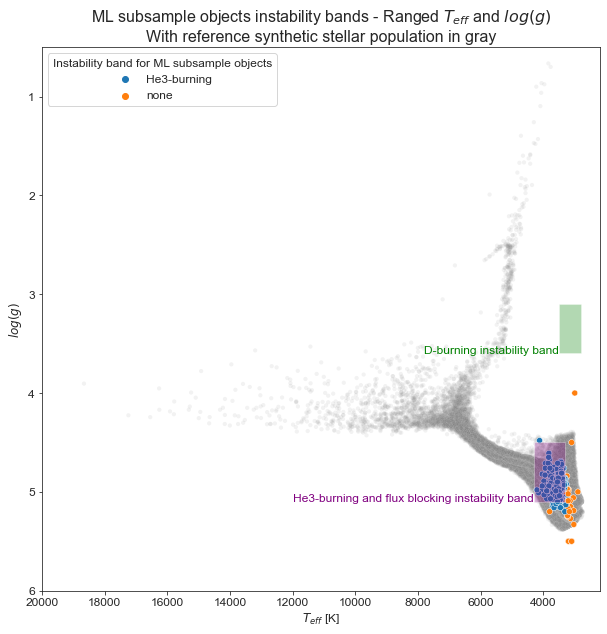

In [53]:
plt.figure(figsize=(10,10))
#ax = sns.scatterplot(data=gto, x='Teff_K', y='logg', hue='InstBand_ranged')
# Draw the synthetic population:
ax = sns.scatterplot(data=stellar_pop, x='Teff', y='log_g', color='gray', size=1.0, alpha=0.1,
                     legend=False)

# Set plot limits as per typical logg and Teff values in HR diagram.
x_min = 2200
x_max = 20000
y_min = 0.50
y_max = 6.00
ax.set_xlim((x_min, x_max))
ax.set_ylim((y_min, y_max))

# Add the synthetic population:
#sns.scatterplot(data=stellar_pop, x='Teff', y='log_g', color='gray', size=1.0, alpha=0.1,
#                ax=ax, legend=False)
# Add the ML sample objetcs:
sns.scatterplot(data=ml_df, x='Teff_K', y='logg', hue='InstBand_ranged',
                ax=ax, legend=True)

# Add patches and label for instability regions:
ax.add_patch(mpatches.Rectangle((2800, 3.1), 700, 0.5, facecolor="green", alpha=0.30))
ax.text(3500, 3.6, "D-burning instability band", color="green", fontsize=12, ha='right')
ax.add_patch(mpatches.Rectangle((3300, 4.5), 1000, 0.6, facecolor="purple", alpha=0.30))
ax.text(4300, 5.1, "He3-burning and flux blocking instability band", color="purple", fontsize=12, ha='right')

# Set titles, sizes etc.
ax.set_title("ML subsample objects instability bands - Ranged $T_{eff}$ and $log(g)$\n"
             "With reference synthetic stellar population in gray", fontsize=16)
ax.set_xlabel("$T_{eff}$ [K]", fontsize=12)
ax.set_ylabel("$log(g)$", fontsize=12)
ax.tick_params(axis='both', which='major', bottom=True, left=True, labelsize=12)
ax.invert_xaxis()
ax.invert_yaxis()
plt.legend(title="Instability band for ML subsample objects", title_fontsize='large',
           loc='upper left', fontsize=12)
plt.savefig(IMAGE_RANGED_OUT_FULL_HR)
plt.show();

##### He-Fb IS visualization (zoom in HR ranges of interest)

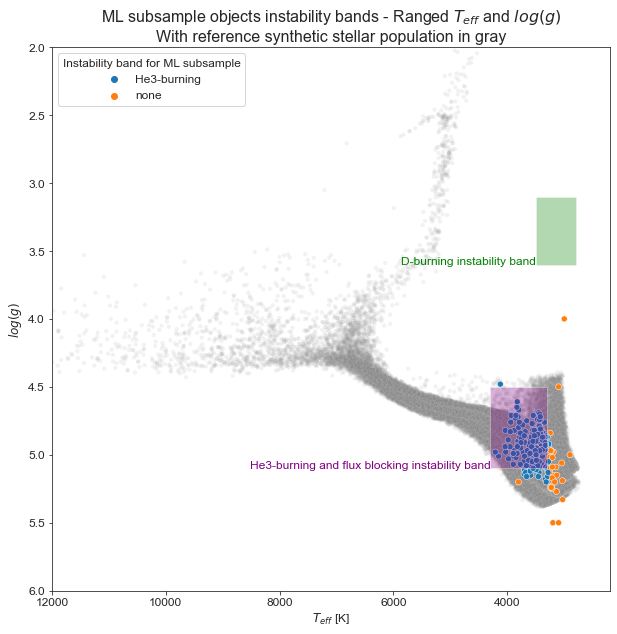

In [54]:
plt.figure(figsize=(10,10))
#ax = sns.scatterplot(data=gto, x='Teff_K', y='logg', hue='InstBand_ranged')
# Draw the synthetic population:
ax = sns.scatterplot(data=stellar_pop, x='Teff', y='log_g', color='gray', size=1.0, alpha=0.1,
                     legend=False)

# Set plot limits as per typical logg and Teff values in HR diagram.
x_min = 2200
x_max = 12000
y_min = 2.00
y_max = 6.00
ax.set_xlim((x_min, x_max))
ax.set_ylim((y_min, y_max))

# Add the synthetic population:
#sns.scatterplot(data=stellar_pop, x='Teff', y='log_g', color='gray', size=1.0, alpha=0.1,
#                ax=ax, legend=False)
# Add the GTO objetcs:
sns.scatterplot(data=ml_df, x='Teff_K', y='logg', hue='InstBand_ranged',
                ax=ax, legend=True)

# Add patches and label for instability regions:
ax.add_patch(mpatches.Rectangle((2800, 3.1), 700, 0.5, facecolor="green", alpha=0.30))
ax.text(3500, 3.6, "D-burning instability band", color="green", fontsize=12, ha='right')
ax.add_patch(mpatches.Rectangle((3300, 4.5), 1000, 0.6, facecolor="purple", alpha=0.30))
ax.text(4300, 5.1, "He3-burning and flux blocking instability band", color="purple", fontsize=12, ha='right')

# Set titles, sizes etc.
ax.set_title("ML subsample objects instability bands - Ranged $T_{eff}$ and $log(g)$\n"
             "With reference synthetic stellar population in gray", fontsize=16)
ax.set_xlabel("$T_{eff}$ [K]", fontsize=12)
ax.set_ylabel("$log(g)$", fontsize=12)
ax.tick_params(axis='both', which='major', bottom=True, left=True, labelsize=12)
ax.invert_xaxis()
ax.invert_yaxis()
plt.legend(title="Instability band for ML subsample", title_fontsize='large',
           loc='upper left', fontsize=12)
plt.savefig(IMAGE_RANGED_OUT_ZOOM_HR)
plt.show();

#### RV curves characteristics (ML subsample)

In [55]:
ml_rv_main_vars = ml_df[['Karmn', 'n_RV', 'Ps_RV', 'fs_RV', 'wmean_RV', 'wrms_RV',
                         'rms_PG_RV', 'f_PG_RV', 'Pd_PG_RV', 'FAP_PG_RV']] \
    .copy()

In [56]:
ml_rv_main_vars.describe()

,n_RV,Ps_RV,fs_RV,wmean_RV,wrms_RV,rms_PG_RV,f_PG_RV,Pd_PG_RV,FAP_PG_RV
count,233.000000,233.000000,233.000000,2.330000e+02,233.000000,2.330000e+02,233.000000,233.000000,2.330000e+02
mean,59.437768,17.210224,1.568448,-9.194841e-02,3.021702,1.647894e+00,142.591264,0.031638,1.995063e-01
std,92.828200,28.710020,20.617796,3.369681e-01,0.879263,1.076858e+00,87.030603,0.074612,2.552891e-01
min,4.000000,0.003176,0.003577,-2.736329e+00,0.666710,1.075686e-07,2.644480,0.003491,7.762397e-23
25%,16.000000,3.807657,0.047681,-1.124968e-01,2.365640,7.492616e-01,66.076960,0.004470,2.615290e-02
50%,33.000000,9.939187,0.100612,-1.110223e-16,2.812982,1.558639e+00,149.889920,0.006672,8.811776e-02
75%,65.000000,20.972757,0.262629,1.387779e-16,3.593585,2.538085e+00,223.732720,0.015134,2.512788e-01
max,768.000000,279.563572,314.907497,1.351190e+00,4.977859,4.260121e+00,286.430560,0.378146,9.999998e-01


**OBSERVATION:** RV time series values (Minimum - Median - Maximum) for ML analysis subsample (in **bold**, the changes relative to the overall sample stats):
- `n_RV`, number of RV points: (4 - **33** - 768)
- `Ps_RV`, sampling period: (0.0032 - **9.94** - **279**) days
- `wrms_RV`, RMS value of the RV time series: (0.67 / **2.81** / **4.98**) m/s
- `Pd_PG_RV`, detected periodogram periods: (0.0035 - **0.0067** - **0.3781**) d = (5 min - **9.7** min - **9.1** h)
- `FAP_PG_RV`, False Alarm Probability for calculated peak: (7.76e-23 - **0.088** - 1.00)

##### Number of points analysis (RV curves - ML subsample)

C:\Users\ciroe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    233.000000
mean      59.437768
std       92.828200
min        4.000000
25%       16.000000
50%       33.000000
75%       65.000000
max      768.000000
Name: n_RV, dtype: float64
p = 7.52668e-55
***This distribution does NOT come from a Gaussian distribution(with significance level = 0.999000)


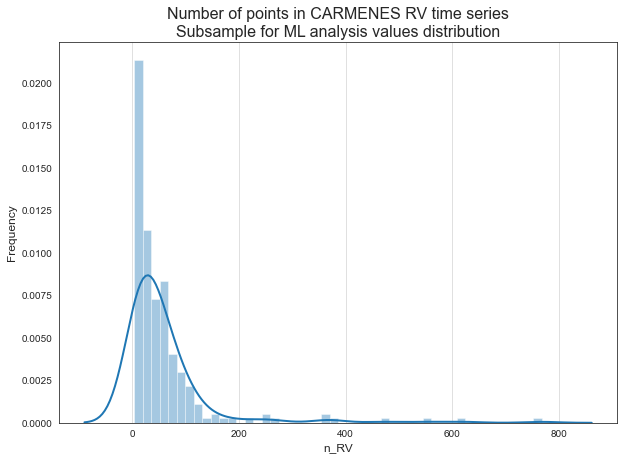

In [57]:
draw_hist(ml_rv_main_vars['n_RV'],
          "Number of points in CARMENES RV time series\nSubsample for ML analysis",
          fig_filename=IMAGE_FOLDER + "ETL_46_10_ML_SUBSAMPLE_RV_Number_of_points_distribution.png")

In [58]:
np.nanquantile(ml_rv_main_vars['n_RV'], q=0.94)

157.15999999999997

In [59]:
np.nanquantile(ml_rv_main_vars['n_RV'], q=0.95)

175.59999999999934

In [60]:
np.nanquantile(ml_rv_main_vars['n_RV'], q=0.96)

239.03999999999996

**OBSERVATION:**
- Most of the RV time series ($95\%$) have less than $176$ points.

##### Sampling period analysis (RV curves - ML subsample)

C:\Users\ciroe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    233.000000
mean      17.210224
std       28.710020
min        0.003176
25%        3.807657
50%        9.939187
75%       20.972757
max      279.563572
Name: Ps_RV, dtype: float64
p = 2.22429e-64
***This distribution does NOT come from a Gaussian distribution(with significance level = 0.999000)


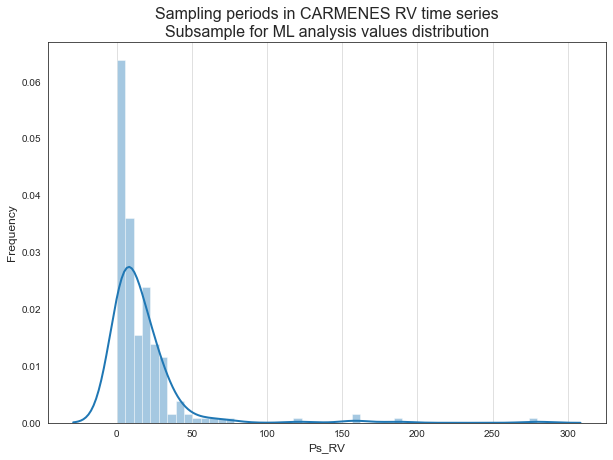

In [61]:
draw_hist(ml_rv_main_vars['Ps_RV'],
          "Sampling periods in CARMENES RV time series\nSubsample for ML analysis",
          fig_filename=IMAGE_FOLDER + "ETL_46_11_ML_SUBSAMPLE_RV_Sampling_period_distribution.png")

In [62]:
np.nanquantile(pg_rv_main_vars['Ps_RV'], q=0.03)

0.9800206009112299

In [63]:
np.nanquantile(pg_rv_main_vars['Ps_RV'], q=0.04)

1.005794213572517

**OBSERVATION:**
- Most of the RV time series ($96\%$) have sampling periods greater than $\approx1$ day.

##### RMS analysis (RV curves - ML subsample)

C:\Users\ciroe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    2.330000e+02
mean     1.647894e+00
std      1.076858e+00
min      1.075686e-07
25%      7.492616e-01
50%      1.558639e+00
75%      2.538085e+00
max      4.260121e+00
Name: rms_PG_RV, dtype: float64
p = 5.62924e-07
***This distribution does NOT come from a Gaussian distribution(with significance level = 0.999000)


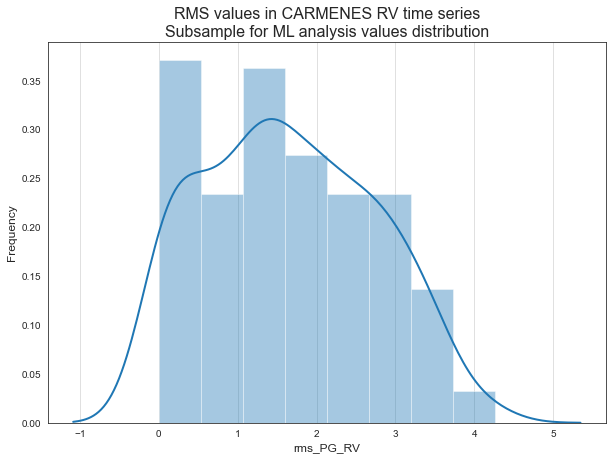

In [64]:
draw_hist(ml_rv_main_vars['rms_PG_RV'],
          "RMS values in CARMENES RV time series\nSubsample for ML analysis",
          fig_filename=IMAGE_FOLDER + "ETL_46_12_ML_SUBSAMPLE_RV_RMS_values_distribution.png")

In [65]:
np.nanquantile(ml_rv_main_vars['rms_PG_RV'], q=0.74)

2.45291552378823

In [66]:
np.nanquantile(ml_rv_main_vars['rms_PG_RV'], q=0.75)

2.538085278212751

In [67]:
np.nanquantile(ml_rv_main_vars['rms_PG_RV'], q=0.76)

2.559384879812065

**OBSERVATION:**
- $75\%$ of the time series show RMS values lower than $2.54\;m\;s^{-1}$.

# Summary

**OBSERVATIONS AND CONCLUSIONS:**
From the 390 objects (387 in practice, as 3 objects have empty RV files) of the CARMENES NZP-corrected RV time series, we have inspected the values of the more relevant variables:

- 269 objects for periodogram analysis (for them, both RV and _TESS_ periodograms are available).
- 233 objects for Machine Learning analysis (objects with RMS < 5 $ms^{-1}$).
- The prior value for the fraction of pulsating stars will be taken as $\approx87\%$, in line with the fraction of stars located inside the instability band for the subsample selected for ML analysis (as opposed to the $\approx74\%$ value yielded for the overall CARM\_VIS sample).
